In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-road-safety-accidents-and-vehicles/Vehicle_Information.csv
/kaggle/input/uk-road-safety-accidents-and-vehicles/Accident_Information.csv


# Context

Every year, approximately 1.3 million people lose their lives due to road accidents, while 20-50 million people suffer from non-fatal injuries or disabilities as a result of their injuries. Road accidents result in considerable economic losses for individuals, their families, and nations as a whole. These losses result from the cost of treatment and the loss of productivity of those killed or disabled by their injuries, as well as family members who must take time off work or school to care for the injured. Road accidents cost most countries 3% of their gross domestic product.

Looking at the data, we can analyze it to find useful information about the accidents that have occurred.

**What is Exploratory Data Analysis (EDA)?**

Exploratory Data Analysis (EDA) is what data analysts do with large data sets, searching for patterns and summarizing the main characteristics of the data set beyond what they learn through modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst uses EDA, it's like asking the data to tell them what they don't know.

It is an approach to data analysis that uses these techniques:

* Optimize the understanding of a data set.
* Discover underlying structures.
* Extract important variables.
* Detect outliers and anomalies.
* Test underlying hypotheses.
* Determine optimal parameter settings.

# EDA

In [2]:
# We import the usuals.
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppressmoccasin all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
accidents = pd.read_csv('C:/Users/digit/Downloads/data/Accident_Information.csv')

In [4]:
print('Observations: ', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Le nombre d'observartions:  2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [5]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype         
---  ------                                       -----         
 0   Accident_Index                               object        
 1   1st_Road_Class                               object        
 2   1st_Road_Number                              float64       
 3   2nd_Road_Class                               object        
 4   2nd_Road_Number                              float64       
 5   Accident_Severity                            object        
 6   Carriageway_Hazards                          object        
 7   Date                                         datetime64[ns]
 8   Day_of_Week                                  object        
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64       
 10  Junction_Control                             object        
 11  Junction_Detail                      

# Distribution of Accidents by Severity


In [7]:
# color schemes
urban_rural_cmap = ["dodgerblue", "lavender"]


In [8]:
# view numbers of major and non-major accidents (by definition of Safety team)
accidents.Accident_Severity.value_counts()

Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

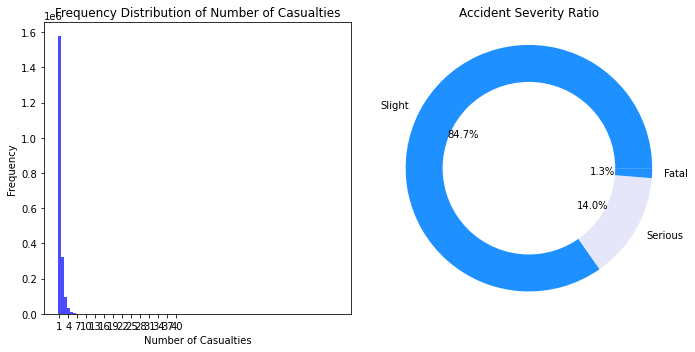

In [9]:
import matplotlib.gridspec as gs

# make figure
fig=plt.figure(figsize=(10,5))

# add grid axes
ax = plt.gca()
grid_layout = gs.GridSpec(ncols=2, nrows=1, figure=fig)
left = plt.subplot(grid_layout[0,0])
right = plt.subplot(grid_layout[0,1])

# draw distribution of number of casualties
casualty_count = accidents.Number_of_Casualties.value_counts()
left.bar(x=casualty_count.index, height=casualty_count.values, color="blue", alpha= 0.7)
left.set_xticks(np.arange(1,42,3))
left.set_xlabel("Number of Casualties")
left.set_ylabel("Frequency")
left.set_title("Frequency Distribution of Number of Casualties")


# plot pie chart of accident severity percents
severity_ratio = accidents.Accident_Severity.value_counts()
severity_ratio.plot.pie(autopct="%.1f%%", ax=right, colors=urban_rural_cmap)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
right.axis('equal')  
right.set_title("Accident Severity Ratio")
right.set_ylabel("")
plt.tight_layout()


**EDA** process can be broadly categorized as follows.

1. Location and Time.
1. Road characteristics. 
1. Weather and environmental influences.

# TIME

***Are there any patterns in the time of day/ day of the week when major incidents occur?***

Text(0.5, 0, '   Sunday ,  Monday  ,Tuesday , Wednesday ,Thursday , Friday , Saturday')

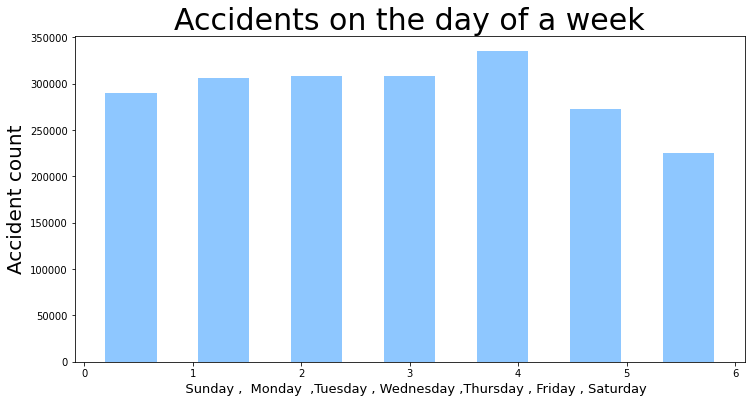

In [10]:
plt.figure(figsize=(12,6))
accidents.Date.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'dodgerblue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('   Sunday ,  Monday  ,Tuesday , Wednesday ,Thursday , Friday , Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2014.
We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

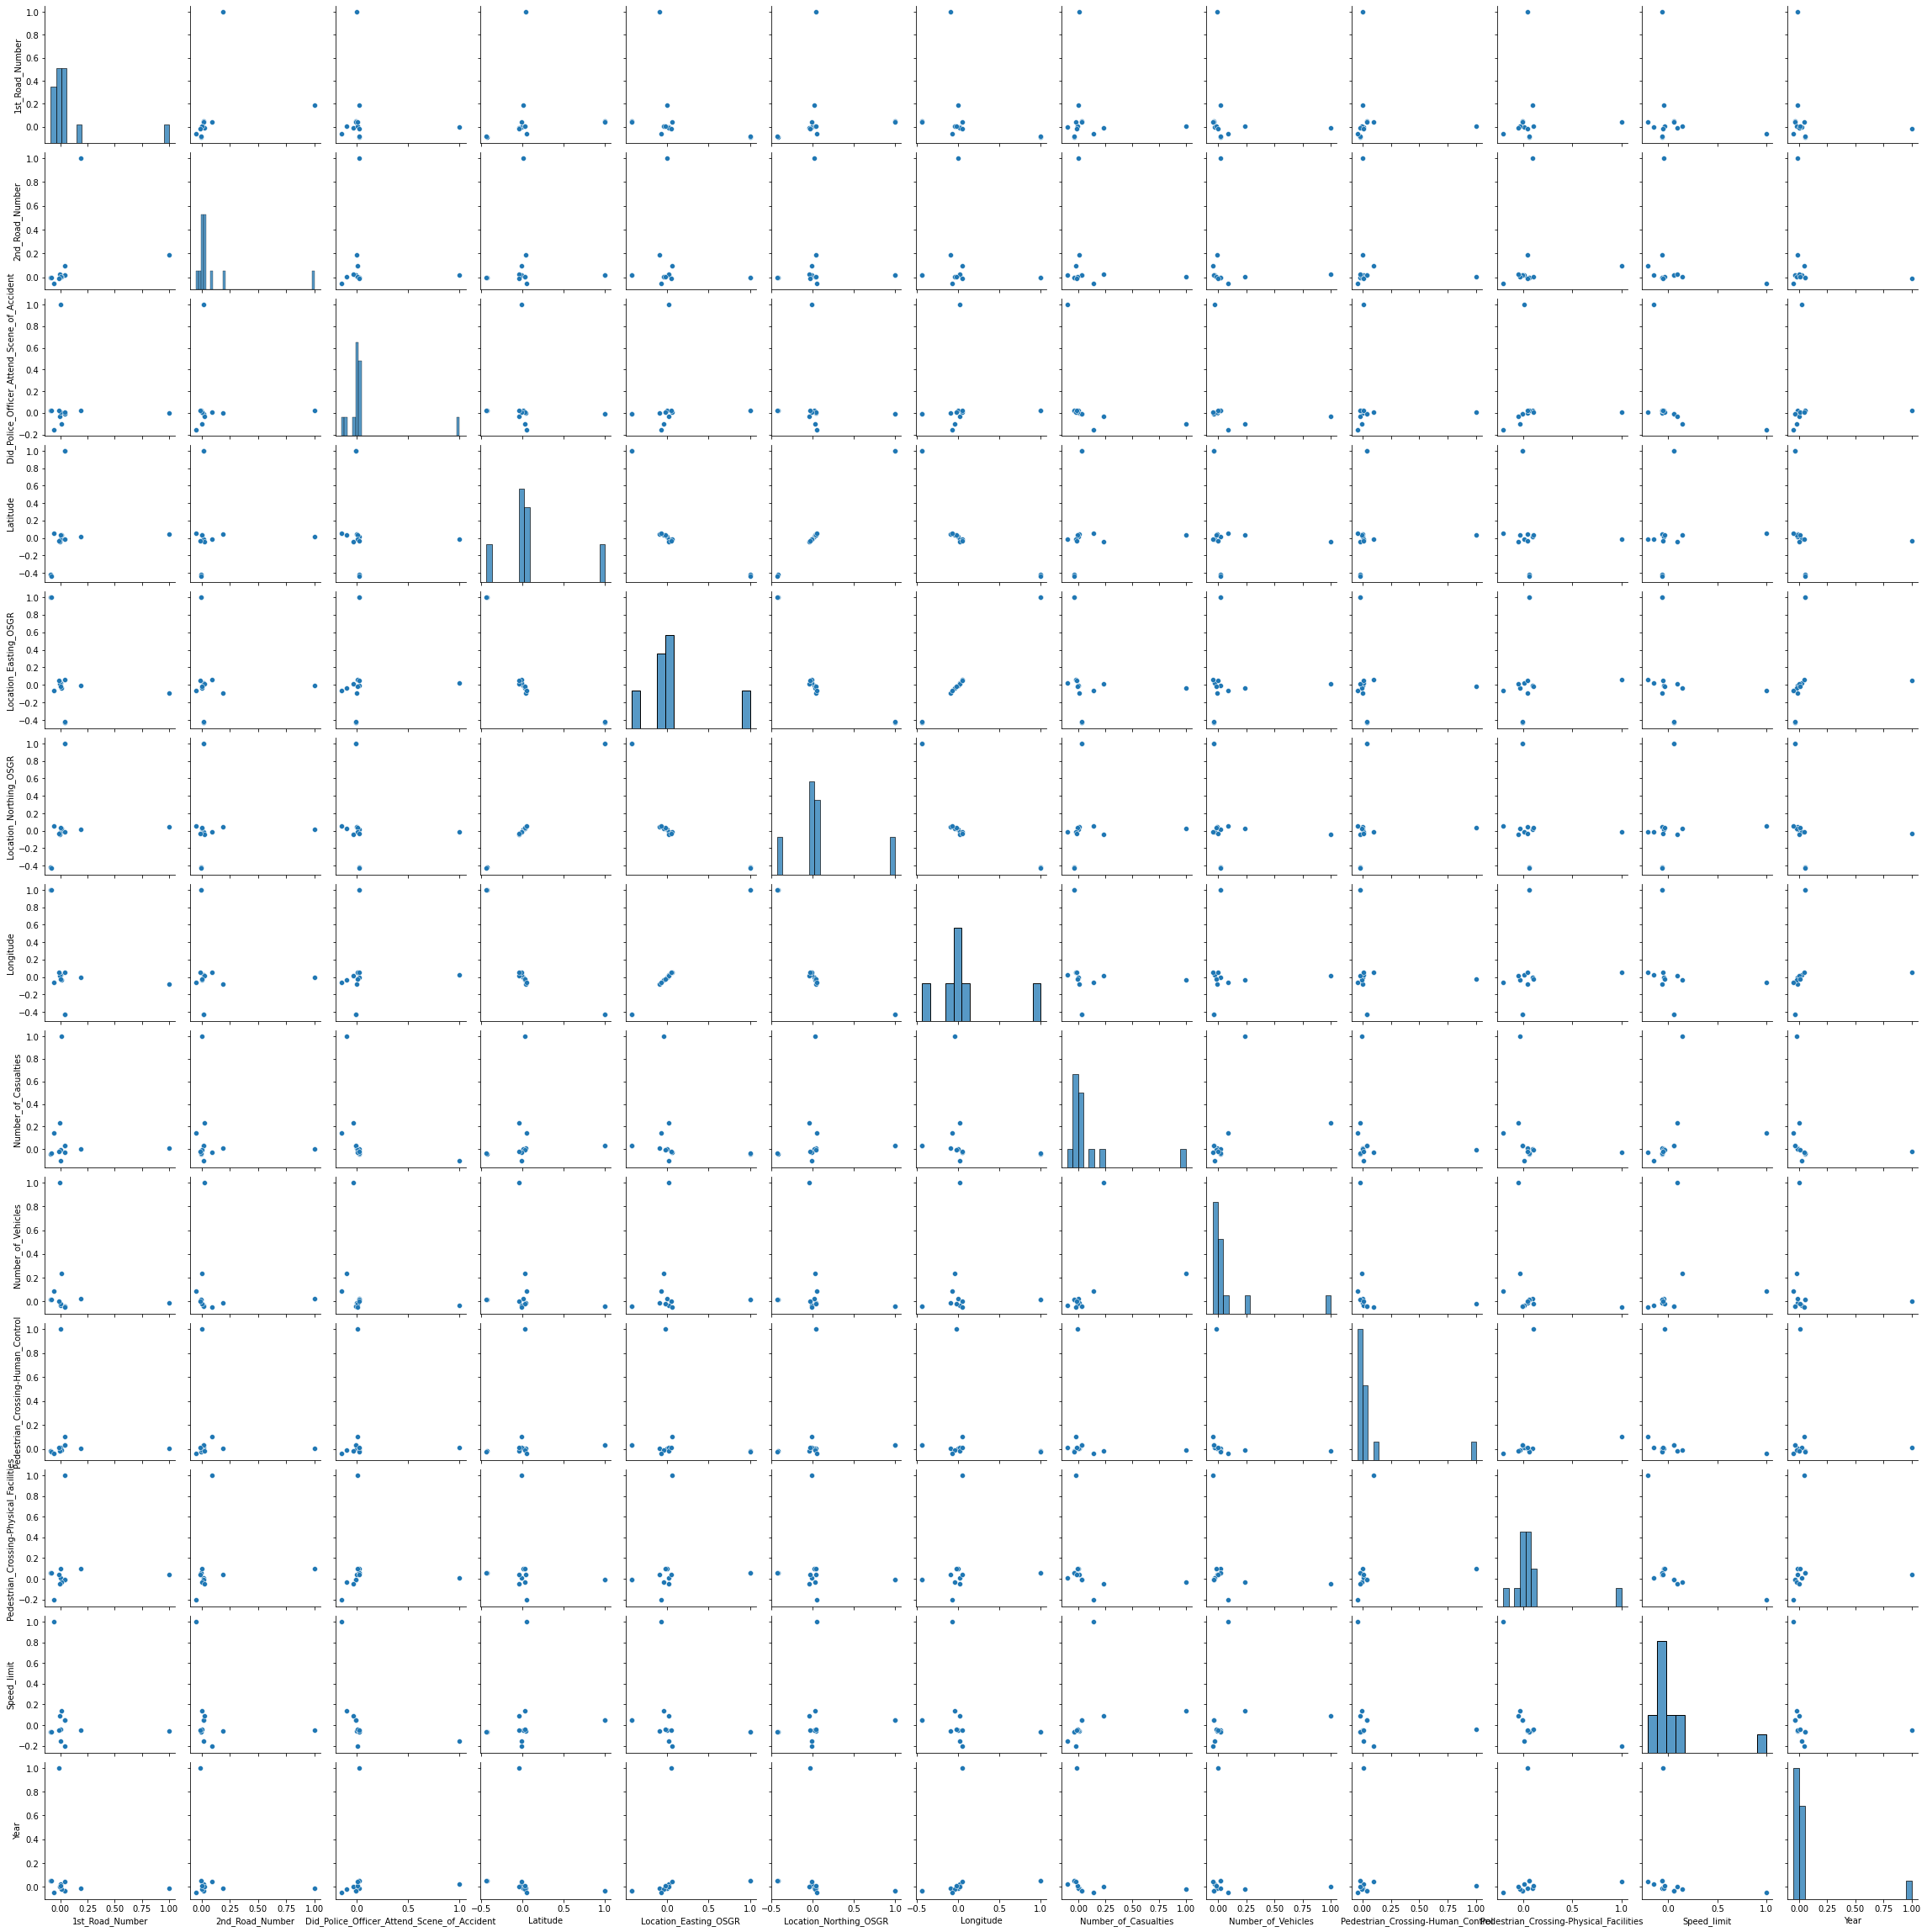

In [11]:
corr =  accidents.corr()
sns.pairplot(corr)

<AxesSubplot:>

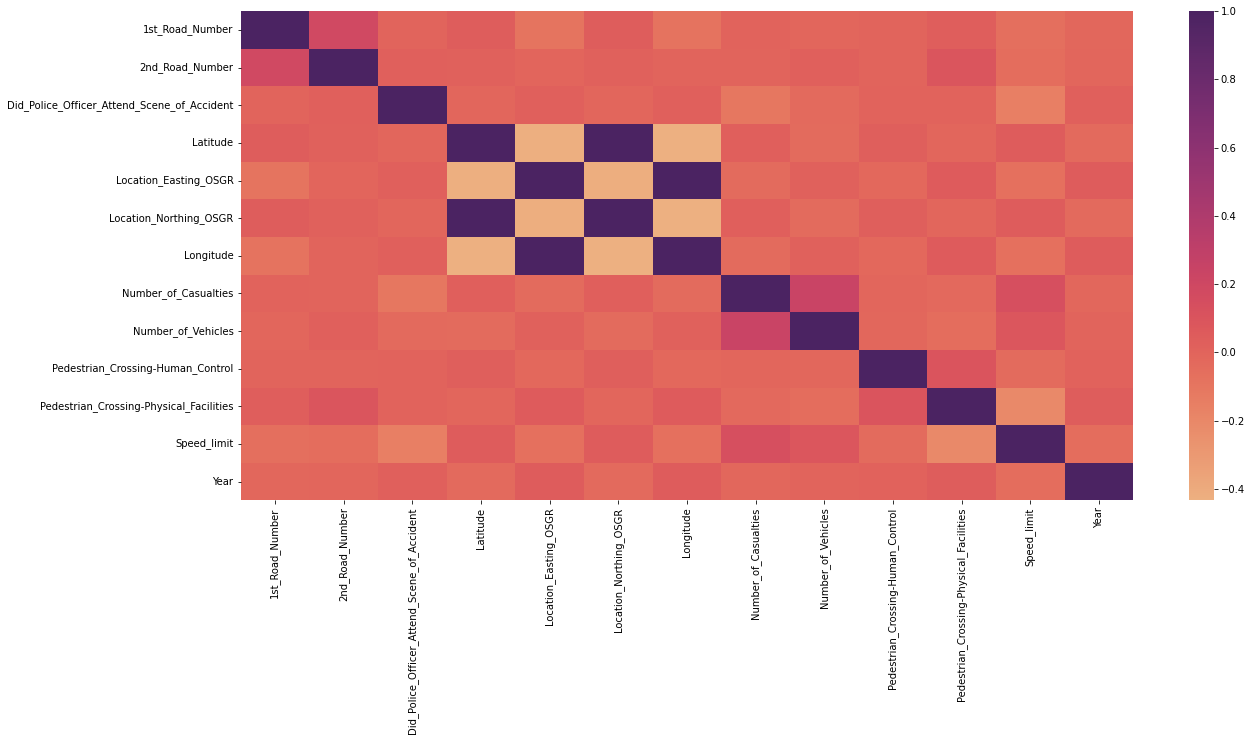

In [12]:
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, cmap="flare")

In [13]:
accidents_time = accidents[['Date', 'Day_of_Week', 'Time']]
accidents_time.head()

,Date,Day_of_Week,Time
0,2005-01-04,Tuesday,17:42
1,2005-01-05,Wednesday,17:36
2,2005-01-06,Thursday,00:15
3,2005-01-07,Friday,10:35
4,2005-01-10,Monday,21:13


***Has the number of accidents increased or decreased over the last few years?***

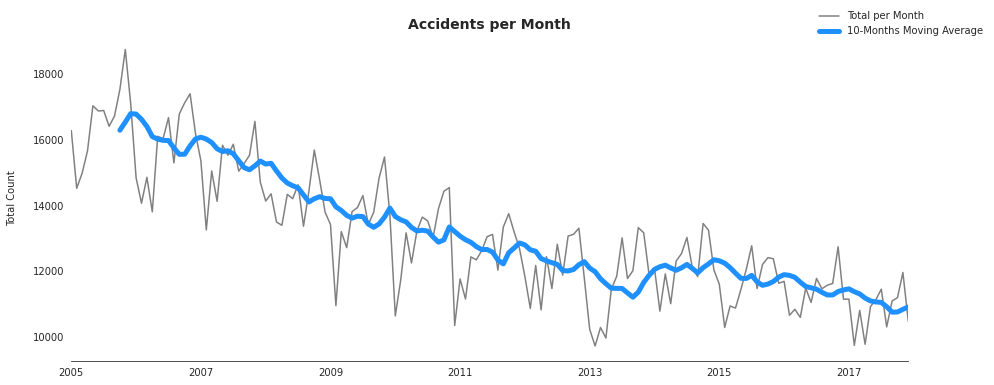

In [14]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='dodgerblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

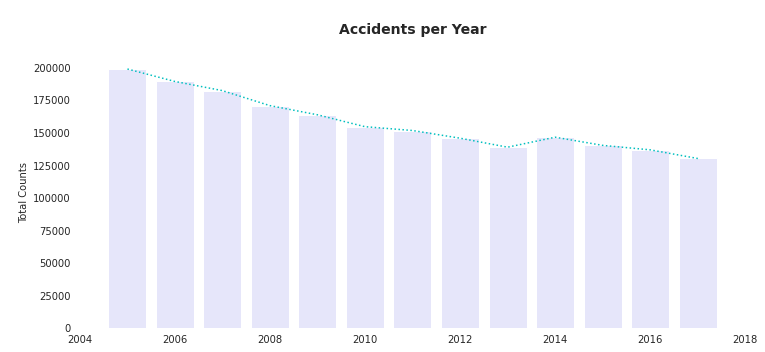

In [15]:
yearly_count = accidents['Date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lavender')
ax.plot(yearly_count, linestyle=':', color='c')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

# LOCATION

***How are accidents related to weather conditions?***

> Preparing dataframe that calculates average accidents per weekday

In [16]:
accidents.Weather_Conditions.value_counts(normalize=True)

Fine no high winds              0.801119
Raining no high winds           0.116879
Other                           0.021533
Unknown                         0.020770
Raining + high winds            0.013844
Fine + high winds               0.012610
Snowing no high winds           0.006539
Fog or mist                     0.005406
Snowing + high winds            0.001215
Data missing or out of range    0.000085
Name: Weather_Conditions, dtype: float64

As most of the days the Weather_Condition is "fine" (=1), most accidents will likely to be happen then.

**What percentage of each category of accident severity do we have?**

In [17]:
accidents.Accident_Severity.value_counts()

Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

> Plotting this dataframe:

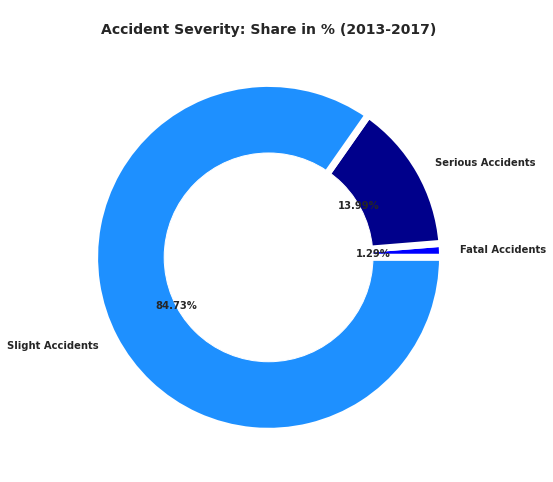

In [18]:
# assign the data
fatal   = accidents.Accident_Severity.value_counts()['Fatal']
serious = accidents.Accident_Severity.value_counts()['Serious']
slight  = accidents.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]

# create a pie chart
plt.pie(x=size, labels=names, colors=['b', 'darkblue', 'dodgerblue'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

**How has the number of fatalities developed over the years?**

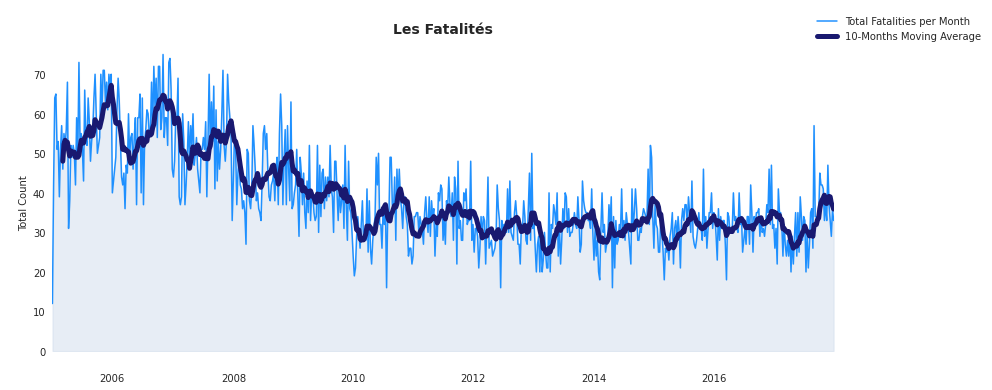

In [19]:
# set the criterium to slice the fatalaties
criteria = accidents['Accident_Severity']=='Fatal'
# create a new dataframe
weekly_fatalities = accidents.loc[criteria].set_index('Date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='dodgerblue', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='lightsteelblue', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='midnightblue', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nLes Fatalités', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [20]:
district_top_10 = pd.DataFrame(accidents['Local_Authority_(District)'].value_counts()).sort_values('Local_Authority_(District)', ascending = False)[:10].reset_index()
district_top_10 = district_top_10.rename(columns={'index': 'city', 'Local_Authority_(District)': 'accidents'})
district_top_10

,city,accidents
0,Birmingham,39662
1,Leeds,27334
2,Westminster,19774
3,Glasgow City,18555
4,Bradford,18147
5,Manchester,18113
6,Sheffield,17321
7,Liverpool,17281
8,"Edinburgh, City of",15774
9,Lambeth,14943


> **Par quartier**

*Représentation du nombre d'accidents selon les quartiers*

In [21]:
def get_district(code):
  if code == 300:
    return 'Birmingham'
  elif code == 204:
    return 'Leeds'
  elif code == 102:
    return 'Manchester'
  elif code == 1:
    return 'Westminster'
  elif code == 200:
    return 'Bradford'
  elif code == 91:
    return 'Liverpool'
  elif code == 215:
    return 'Sheffield'
  elif code == 601:
    return 'Bristol'
  elif code == 9:
    return 'Lambeth'
  elif code == 203:
    return 'Kirklees'

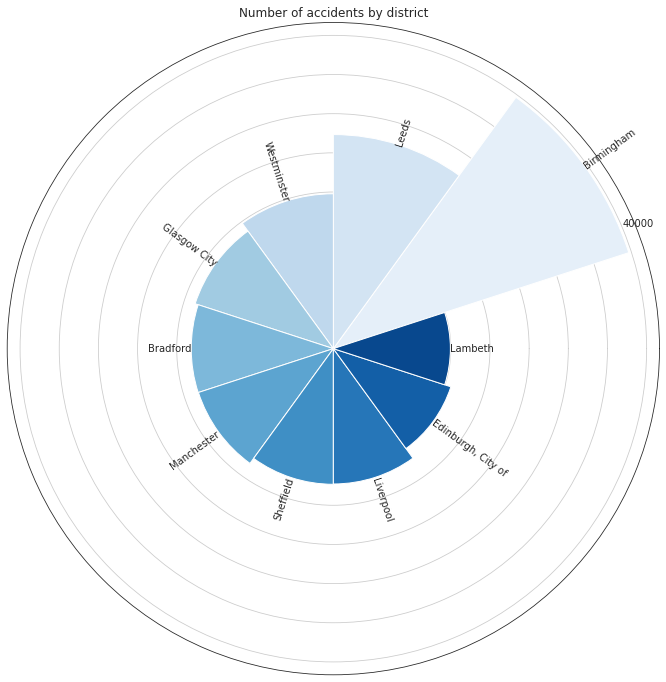

In [22]:
pal = list(sns.color_palette(palette='Blues', n_colors=len(district_top_10['city'])).as_hex())
lowerLimit = 0
max_v = district_top_10['accidents'].max()

plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()
    
heights = district_top_10['accidents']
width = 2*np.pi / len(district_top_10.index)

indexes = list(range(1, len(district_top_10.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal)
    
labelPadding = 2

for bar, angle, height, label in zip(bars, angles, heights, district_top_10['city']):
    rotation = np.rad2deg(angle)
    alignment = ""
      
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    
    ax.set_thetagrids([], labels=[])
    plt.title('Number of accidents by district')
    ax

# ROAD CHARACTERISTICS & FACILITIES



# Type of Junction

In [23]:
# manually rename junction details since names in lookup are too long & take lots of space
junction_detail_names = {0: "No junction/within 20m",\
                         1: "Roundabout",\
                         2: "Mini-roundabout",\
                         3: "T/staggered junction",\
                         5: "Slip road",\
                         6: "Crossroads",\
                         7: ">4 arms(not roundabout)",\
                         8: "Private drive/enterence",\
                         9: "other junction",\
                         99: "unknown(self-reported)",\
                         -1: "data missing/out of range"}
accidents.Junction_Detail = accidents.Junction_Detail.replace(junction_detail_names)

# shrink junction detail name text for pie plots
junction_detail_names = {"No junction/within 20m": "no junction",\
                         "Mini-roundabout": "others",\
                         "T/staggered junction": "T / Staggered",\
                         "Slip road": "others",\
                         ">4 arms(not roundabout)": "others",\
                         "Private drive/enterence": "others",\
                         "other junction": "others",\
                         "unknown(self-reported)": "others",\
                         "data missing/out of range": "others"}

**Accidents in Each Junction Type (Urban & Rural Areas)**

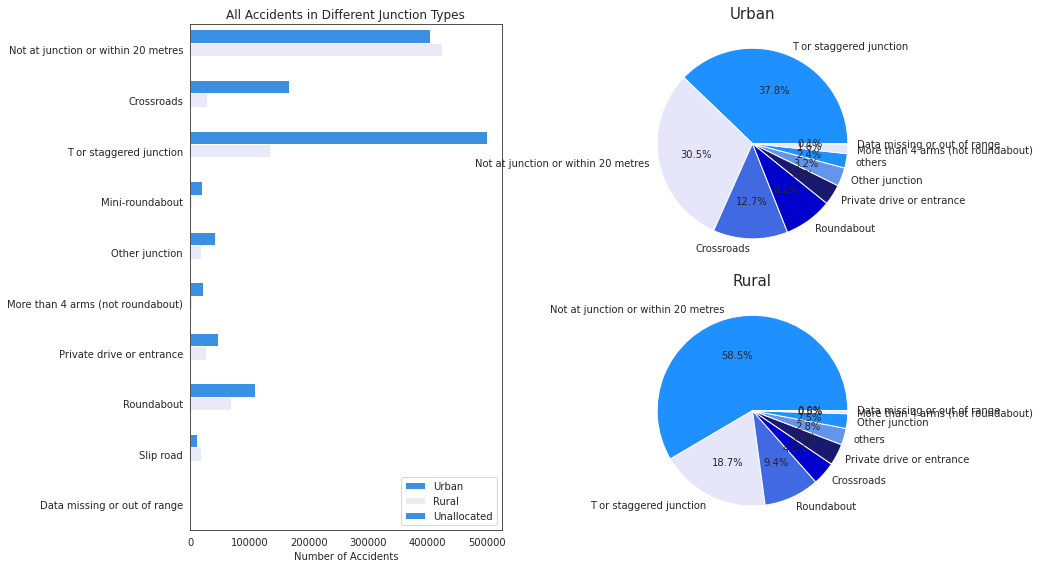

In [24]:
# make figure
plt.figure(figsize=(14,8))
ax = plt.gca()

# make grids
grid_layout = gs.GridSpec(2,2)
left = plt.subplot(grid_layout[:,0])
right_top = plt.subplot(grid_layout[0, 1])
right_bottom = plt.subplot(grid_layout[1, 1])

# make horizontal countplot
sns.countplot(y="Junction_Detail", hue="Urban_or_Rural_Area", ax=left,\
              data=accidents, palette=urban_rural_cmap)
left.set_xlabel("Number of Accidents")
left.set_ylabel("")
left.set_title("All Accidents in Different Junction Types")
left.legend(loc="lower right")

# plot upper right pie
data = accidents[accidents.Urban_or_Rural_Area=="Urban"].Junction_Detail
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_top,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_top.set_ylabel("")
right_top.set_title("Urban", fontsize=15)

# plot lower right pie
data = accidents[accidents.Urban_or_Rural_Area=="Rural"].Junction_Detail
data = data.replace(junction_detail_names).value_counts()
data.plot.pie(autopct="%.1f%%", ax=right_bottom,\
              colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
right_bottom.set_ylabel("")
right_bottom.set_title("Rural", fontsize=15)

plt.tight_layout()


Is there any junction control conditions that make a junction more suspectible to accidents?

In [25]:
# manually rename junction control since names in lookup are too long
junction_control_name = {-1: "Data missing/out of range",\
                          1: "Authorised person",\
                          2: "Auto traffic signal",\
                          3: "Stop sign",\
                          4: "Give way/uncontrolled",\
                          9: "unknown(self-reported)"}
accidents.Junction_Control = accidents.Junction_Control.replace(junction_control_name)


***Fatal Accident Percent for Each Special Condition***

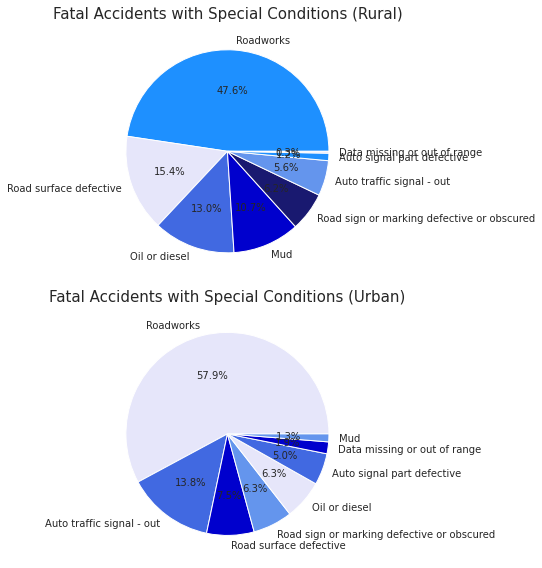

In [26]:
fig, (top, bottom) = plt.subplots(2,1, figsize=(10,8))

# for rural area
data = accidents.query("((Special_Conditions_at_Site!='None') & (Accident_Severity=='Fatal'))\
                            & (Urban_or_Rural_Area=='Rural')")
data.Special_Conditions_at_Site.value_counts().plot.pie(autopct="%.1f%%", ax=top,\
                                colors=["dodgerblue", "lavender", "royalblue", "mediumblue", "midnightblue", "cornflowerblue"])
top.set_ylabel('')
top.set_title("Fatal Accidents with Special Conditions (Rural)", fontsize=15)

# for urban area
data = accidents.query("((Special_Conditions_at_Site!='None') & (Accident_Severity=='Fatal'))\
                            & (Urban_or_Rural_Area=='Urban')")
data.Special_Conditions_at_Site.value_counts().plot.pie(autopct="%.1f%%", ax=bottom,\
                                colors=["lavender", "royalblue", "mediumblue", "cornflowerblue"])
bottom.set_ylabel('')
bottom.set_title("Fatal Accidents with Special Conditions (Urban)", fontsize=15)

plt.tight_layout()

# Visualize these accidents on the map🗺

In [27]:
import folium

In [28]:
df = accidents.dropna(subset = ['Latitude' , 'Longitude'])
display(df.Latitude.isna().sum())
display(df.Longitude.isna().sum())

0

0

In [29]:
df.Latitude = pd.to_numeric(df.Latitude)
df.Longitude = pd.to_numeric(df.Longitude)

In [30]:
x_mean = df.Latitude.mean()
y_mean = df.Longitude.mean()

In [31]:
df[['Latitude','Longitude']].min().tolist()

[49.912941, -7.516225]

In [32]:
df_min = df[['Latitude','Longitude']].min().tolist()
df_max = df[['Latitude','Longitude']].max().tolist()

df_x_min = df[df['Latitude'] == df_min[0]][['Latitude','Longitude']].to_records()[0]
df_x_min = [df_x_min[1], df_x_min[2]]

df_y_min = df[df['Longitude'] == df_min[1]][['Latitude','Longitude']].to_records()[0]
df_y_min = [df_y_min[1], df_y_min[2]]


df_x_max = df[df['Latitude'] == df_max[0]][['Latitude','Longitude']].to_records()[0]
df_x_max = [df_x_max[1], df_x_max[2]]

df_y_max = df[df['Longitude'] == df_max[1]][['Latitude','Longitude']].to_records()[0]
df_y_max = [df_y_max[1], df_y_max[2]]

In [33]:
# Uses lat then lon. The bigger the zoom number, the closer in you get
map_hooray = folium.Map(location=[x_mean,y_mean],
                    zoom_start = 4.3)
folium.Marker(df_x_min, popup='Min X').add_to(map_hooray)
folium.Marker(df_y_min, popup='Min Y').add_to(map_hooray)
folium.Marker(df_x_max, popup='Max X').add_to(map_hooray)
folium.Marker(df_y_max, popup='Max Y').add_to(map_hooray)

rec = [df_x_min,df_y_min,df_x_max,df_y_max]
# create a polygon with the coordinates
folium.Polygon(rec,
               color="blue",
               weight=.1,
               fill=True,
               fill_color="orange",
               fill_opacity=0.2).add_to(map_hooray)

map_hooray # Calls the map to display

In [34]:
most_crashes = df[['Latitude','Longitude']].value_counts().head(1000)
most_crashes_df = most_crashes.reset_index()
max_accidents = most_crashes_df[0].max()
# Uses lat then lon. The bigger the zoom number, the closer in you get
map = folium.Map(location=[x_mean,y_mean],
                    zoom_start = 7)

for key,value in most_crashes.iteritems():
    point = [key[0],key[1]]
    radius_val = ((value / max_accidents) ** 2) * 6
    
    folium.CircleMarker(point
                    ,radius=radius_val
                    ,color="blue"
                    ,weight= value/max_accidents
                    ,fill=True
                    ,fill_color="red"
                    ,fill_opacity=1
                    ,popup=f'{value} Accidents Occured'
                   ).add_to(map)
map # Calls the map to display